In [ ]:
# Speech emotion recognition

In [2]:
!pip install -q kaggle

In [3]:
# Upload your kaggle.json file (downloaded from Kaggle Account > API)
from google.colab import files
uploaded = files.upload()  # Upload kaggle.json when prompted

# Move and secure the API token
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
# Create a directory for datasets
!mkdir -p /content/datasets

In [5]:

# Download IESC

!kaggle datasets download -d ejlok1/cremad -p /content/datasets --unzip

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/julianros/ravdess-emotional-speech-audio
403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/sachinkumar413/ser-dataset
Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
 95% 427M/451M [00:00<00:00, 419MB/s]
100% 451M/451M [00:02<00:00, 161MB/s]


In [6]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio -p /content/datasets --unzip

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 91% 391M/429M [00:00<00:00, 366MB/s]
100% 429M/429M [00:01<00:00, 394MB/s]


In [7]:
!kaggle datasets download -d ybsingh/indian-emotional-speech-corpora-iesc -p /content/datasets --unzip

Dataset URL: https://www.kaggle.com/datasets/ybsingh/indian-emotional-speech-corpora-iesc
License(s): unknown
 96% 126M/131M [00:00<00:00, 1.30GB/s]
100% 131M/131M [00:00<00:00, 1.16GB/s]


In [8]:
import os

base_path = "/content/datasets"
for folder in os.listdir(base_path):
    print(folder, "->", len(os.listdir(os.path.join(base_path, folder))), "files")

Actor_15 -> 60 files
Actor_19 -> 60 files
Actor_24 -> 60 files
Actor_10 -> 60 files
Actor_20 -> 60 files
Actor_06 -> 60 files
Actor_05 -> 60 files
Actor_18 -> 60 files
Actor_12 -> 60 files
Actor_03 -> 60 files
Actor_22 -> 60 files
Indian Emotional Speech Corpora (IESC) -> 8 files
audio_speech_actors_01-24 -> 24 files
Actor_17 -> 60 files
Actor_14 -> 60 files
Actor_23 -> 60 files
Actor_21 -> 60 files
Actor_04 -> 60 files
Actor_07 -> 60 files
Actor_01 -> 60 files
Actor_02 -> 60 files
Actor_09 -> 60 files
Actor_08 -> 60 files
Actor_11 -> 60 files
Actor_16 -> 60 files
AudioWAV -> 7442 files
Actor_13 -> 60 files


In [9]:
import glob

zip_files = glob.glob("/content/datasets//*.zip", recursive=True)
print("Zip files still remaining:", zip_files)

Zip files still remaining: []


In [11]:
import glob
import os
import pandas as pd

data = []

# CREMA-D
for file in glob.glob("/content/datasets/AudioWAV/**/*.wav", recursive=True):
    label = file.split('/')[-1].split('_')[2]  # e.g., "ANG", "HAP", "SAD"
    data.append((file, label))

# RAVDESS
for file in glob.glob("/content/datasets/audio_speech_actors_01-24/**/*.wav", recursive=True):
    label = int(file.split('-')[2])
    emotions = {
        1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
        5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'
    }
    data.append((file, emotions[label]))

# IESC
for file in glob.glob("/content/datasets/Indian Emotional Speech Corpora (IESC)/**/*.wav", recursive=True):
    emotion = os.path.basename(os.path.dirname(file))
    data.append((file, emotion))

print("Total files collected:", len(data))

df = pd.DataFrame(data, columns=['file_path', 'emotion'])
display(df['emotion'].value_counts())

Total files collected: 9482


,count
emotion,
neutral,1440
HAP,1271
DIS,1271
FEA,1271
SAD,1271
ANG,1271
NEU,1087
Anger,120
Fear,120


# Task
Preprocess the audio dataset by resampling, normalizing, and extracting features from each audio file. Handle data imbalance if necessary and prepare the data for model training by padding/trimming features and splitting the data into training and testing sets.

## Load necessary libraries

### Subtask:
Import the required libraries for audio processing, data manipulation, and visualization.


**Reasoning**:
Import the necessary libraries for audio processing, data manipulation, machine learning utilities, and visualization.



In [13]:
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Define preprocessing function

### Subtask:
Create a function to handle resampling, normalization, and feature extraction for a single audio file.


**Reasoning**:
Define a function to load, resample, normalize, and extract features from an audio file using librosa.



In [14]:
def extract_features(file_path, target_sr=22050, n_mfcc=40):
    """
    Loads an audio file, resamples, normalizes, and extracts MFCC features.

    Args:
        file_path (str): The path to the audio file.
        target_sr (int): The target sampling rate for resampling.
        n_mfcc (int): The number of MFCCs to extract.

    Returns:
        numpy.ndarray: The extracted MFCC features.
    """
    try:
        # Load the audio file and resample
        y, sr = librosa.load(file_path, sr=target_sr)

        # Normalize the audio data (simple amplitude normalization)
        y = librosa.util.normalize(y)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=y, sr=target_sr, n_mfcc=n_mfcc)

        return mfccs

    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

## Apply preprocessing to dataset

### Subtask:
Apply the preprocessing function to the DataFrame to extract features for all audio files.


**Reasoning**:
Apply the extract_features function to the DataFrame to extract features and handle potential errors.



In [15]:
# Apply the function to the 'file_path' column
df['features'] = df['file_path'].apply(extract_features)

# Remove rows where feature extraction failed (features is None)
df.dropna(subset=['features'], inplace=True)

display(df.head())
display(df.info())

,file_path,emotion,features
0,/content/datasets/AudioWAV/1016_IWW_HAP_XX.wav,HAP,"[[-496.01083, -425.87827, -390.71567, -397.293..."
1,/content/datasets/AudioWAV/1062_ITS_FEA_XX.wav,FEA,"[[-247.2875, -222.19348, -221.7024, -220.35379..."
2,/content/datasets/AudioWAV/1028_ITH_FEA_XX.wav,FEA,"[[-297.2361, -263.3029, -254.96819, -252.1013,..."
3,/content/datasets/AudioWAV/1034_IEO_DIS_HI.wav,DIS,"[[-490.4407, -465.88046, -439.61255, -431.9932..."
4,/content/datasets/AudioWAV/1075_IEO_SAD_MD.wav,SAD,"[[-149.51883, -148.82031, -162.27313, -162.690..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9482 entries, 0 to 9481
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  9482 non-null   object
 1   emotion    9482 non-null   object
 2   features   9482 non-null   object
dtypes: object(3)
memory usage: 222.4+ KB


None

## Handle data imbalance (optional but recommended)

### Subtask:
If necessary, address any class imbalance in the dataset.


**Reasoning**:
Analyze the emotion distribution to determine if class imbalance exists.



In [16]:
print("Emotion distribution before addressing imbalance:")
display(df['emotion'].value_counts())

Emotion distribution before addressing imbalance:


,count
emotion,
neutral,1440
HAP,1271
DIS,1271
FEA,1271
SAD,1271
ANG,1271
NEU,1087
Anger,120
Fear,120


**Reasoning**:
Based on the value counts, there is significant class imbalance. Emotions like 'Anger', 'Fear', 'Sad', 'Happy', and 'Neutral' from the IESC dataset have significantly fewer samples compared to other emotions. To address this, I will use RandomOverSampler to oversample the minority classes.



In [17]:
from imblearn.over_sampling import RandomOverSampler

# Combine similar emotions
df['emotion'] = df['emotion'].replace({
    'HAP': 'happy', 'SAD': 'sad', 'ANG': 'angry', 'FEA': 'fearful', 'DIS': 'disgust',
    'NEU': 'neutral', 'Happy': 'happy', 'Sad': 'sad', 'Anger': 'angry', 'Fear': 'fearful',
    'Neutral': 'neutral'
})

# Separate features (X) and labels (y)
# Since features are numpy arrays, we need to keep them as objects or convert them appropriately
X = df['features'].values
y = df['emotion'].values

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)

# RandomOverSampler works with array-like inputs.
# We need to reshape X to be 2D, even though each 'sample' is a variable-length feature array.
# A common approach for oversampling sequences is to oversample the indices or
# to use a custom sampler if the data structure is complex.
# For simplicity and demonstration, we will reshape X to be a 2D array where each row
# is a flattened version of the feature array. This might not be ideal for sequence models
# but works for demonstrating oversampling with imblearn.

# Let's first pad/trim the features to a fixed length for oversampling if they are not already.
# Assuming features are variable length 2D arrays (n_mfcc, n_frames).
# We need a consistent shape for imblearn or a custom approach.

# A better approach for variable length sequences with imblearn is to oversample the indices
# or use a different strategy. However, given the prompt's simplicity and the typical workflow
# of feature extraction followed by padding/trimming, let's proceed with oversampling on
# the feature arrays directly after padding/trimming, if padding was done previously (it wasn't).
# Let's revisit the padding/trimming step which should ideally happen before oversampling
# if using standard imblearn methods that expect fixed-size samples.

# Since padding/trimming is a later step in the overall task, let's oversample the current
# structure and acknowledge the limitation with variable-length features and standard samplers.
# If the 'features' column contains numpy arrays of inconsistent shapes, RandomOverSampler
# will likely raise an error.
# A workaround is to oversample the indices and then use the oversampled indices to
# create the balanced DataFrame.

# Let's oversample the indices
indices = np.arange(len(df))
indices_resampled, y_resampled = ros.fit_resample(indices.reshape(-1, 1), y)

# Create a new DataFrame with the oversampled data
df_balanced = df.iloc[indices_resampled.flatten()].copy()

print("\nEmotion distribution after oversampling:")
display(df_balanced['emotion'].value_counts())

df = df_balanced # Update the main DataFrame


Emotion distribution after oversampling:


,count
emotion,
happy,2647
fearful,2647
disgust,2647
sad,2647
neutral,2647
angry,2647


## Prepare data for model training

### Subtask:
Pad/trim features to a consistent length and split the data into training and testing sets.


**Reasoning**:
Determine the target length for padding/trimming, pad/trim the features in the 'features' column, separate features and labels, and then split the data into training and testing sets.



In [18]:
# Determine a target length for padding/trimming
# Let's find the maximum length of the features
max_length = max(df['features'].apply(lambda x: x.shape[1]))
print(f"Maximum feature length: {max_length}")

# We can choose a fixed length, for example, the mode or median length,
# or the maximum length. Let's use a fixed length based on common practice
# or analysis if available. For demonstration, let's use a fixed length
# that accommodates most samples without excessive padding/trimming.
# A reasonable approach is to look at the distribution of lengths.
# Let's calculate the lengths and their distribution.
feature_lengths = df['features'].apply(lambda x: x.shape[1])
print("\nFeature length distribution:")
display(feature_lengths.describe())

# Let's choose a target length. For this example, let's pick a length
# that is close to the median or mean, but also allows for some variance.
# Let's choose 175 based on the describe output, which is close to the mean/median.
target_length = 175
print(f"\nTarget feature length for padding/trimming: {target_length}")


# Define a function to pad or trim the features
def pad_trim_features(features, target_length):
    """Pads or trims the MFCC features to a target length."""
    if features.shape[1] < target_length:
        # Pad with zeros
        padding_width = target_length - features.shape[1]
        # Pad along the second axis (time dimension)
        padded_features = np.pad(features, pad_width=((0, 0), (0, padding_width)), mode='constant', constant_values=0)
        return padded_features
    elif features.shape[1] > target_length:
        # Trim the features
        trimmed_features = features[:, :target_length]
        return trimmed_features
    else:
        # No padding or trimming needed
        return features

# Apply the padding/trimming function to the 'features' column
df['padded_features'] = df['features'].apply(lambda x: pad_trim_features(x, target_length))

# Separate features (X) and labels (y)
# X will be the padded/trimmed features, y will be the emotion labels
X = np.array(df['padded_features'].tolist()) # Convert list of arrays to a single numpy array
y = df['emotion'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the shapes of the resulting training and testing sets
print("\nShapes of the resulting sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Maximum feature length: 238

Feature length distribution:


,features
count,15882.000000
mean,117.369916
std,27.560467
min,55.000000
25%,98.000000
50%,113.000000
75%,133.000000
max,238.000000



Target feature length for padding/trimming: 175

Shapes of the resulting sets:
X_train shape: (12705, 40, 175)
X_test shape: (3177, 40, 175)
y_train shape: (12705,)
y_test shape: (3177,)


## Summary:

### Data Analysis Key Findings

*   A preprocessing function was successfully created to load, resample (to 22050 Hz), normalize, and extract 40 MFCC features from individual audio files.
*   Feature extraction was applied to all audio files in the dataset, and rows where feature extraction failed were removed.
*   The initial dataset exhibited significant class imbalance among emotion categories.
*   Class imbalance was addressed using `RandomOverSampler`, resulting in a balanced distribution across emotion classes.
*   Emotion labels were standardized by combining similar categories (e.g., 'HAP' and 'Happy' were mapped to 'happy').
*   The maximum feature length across all samples was 238 frames.
*   Features were padded or trimmed to a consistent target length of 175 frames.
*   The processed data was successfully split into training (80%) and testing (20%) sets, stratified by emotion to maintain class distribution. The resulting shapes are: X\_train (12705, 40, 175), X\_test (3177, 40, 175), y\_train (12705,), y\_test (3177,).

### Insights or Next Steps

*   The preprocessing steps have prepared the audio data in a structured format suitable for training a machine learning model, such as a CNN or RNN, for emotion recognition.
*   The padding/trimming length of 175 frames was chosen based on the distribution; evaluating the impact of different target lengths on model performance could be a valuable next step.


# Task
Build, train, and evaluate a deep learning model for Speech Emotion Recognition (SER) using the preprocessed data.

## Import necessary libraries

### Subtask:
Import libraries for building and training deep learning models (e.g., TensorFlow or PyTorch).


**Reasoning**:
Import the necessary libraries from TensorFlow and Keras for building and training a deep learning model.



In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

## Define the model architecture

### Subtask:
Create a suitable model architecture, such as a CNN or a combination of CNN and RNN layers, for speech emotion recognition.


**Reasoning**:
Define a sequential model with Conv2D, MaxPooling2D, Flatten, Dense, and Dropout layers as specified in the instructions.



In [20]:
# Determine the number of unique emotion classes
num_classes = len(np.unique(y_train))
print(f"Number of emotion classes: {num_classes}")

# Define the input shape for the model
# The shape is (number of MFCCs, target length, 1 for channel)
input_shape = (X_train.shape[1], X_train.shape[2], 1)
print(f"Input shape: {input_shape}")

# Define the model architecture
model = Sequential()

# Add the first Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# Add the first MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second Convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Add the second MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before feeding into dense layers
model.add(Flatten())

# Add a Dense layer
model.add(Dense(units=128, activation='relu'))

# Add a Dropout layer for regularization
model.add(Dropout(rate=0.5))

# Add the output Dense layer
model.add(Dense(units=num_classes, activation='softmax'))

# Display the model summary
model.summary()

Number of emotion classes: 6
Input shape: (40, 175, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 38, 173, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 19, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 17, 84, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 42, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,752,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,772,230 (10.58 MB)

 Trainable params: 2,772,230 (10.58 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

### Subtask:
Configure the model for training by specifying the optimizer, loss function, and metrics.


**Reasoning**:
Compile the defined Keras Sequential model with the specified optimizer, loss function, and metrics.



In [21]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model configuration after compilation
print("\nModel compiled successfully.")
model.summary() # Print summary again to show compilation


Model compiled successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 38, 173, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 19, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 17, 84, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 42, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,752,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,772,230 (10.58 MB)

 Trainable params: 2,772,230 (10.58 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

### Subtask:
Train the model using the preprocessed training data and validate it on the test data.


**Reasoning**:
Convert the training and testing labels to categorical format and train the compiled model using the preprocessed training data and validate it on the test data.



In [22]:
# Convert labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Get the number of classes from the categorical labels shape
num_classes = y_train_categorical.shape[1]

# Train the model
epochs = 50  # You can adjust the number of epochs
batch_size = 32  # You can adjust the batch size

history = model.fit(X_train, y_train_categorical,
                    validation_data=(X_test, y_test_categorical),
                    epochs=epochs,
                    batch_size=batch_size)

ValueError: invalid literal for int() with base 10: 'angry'

**Reasoning**:
The error indicates that `to_categorical` expects integer labels, but the labels are strings. I need to encode the string labels into integers before converting them to categorical format.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert integer labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Get the number of classes from the categorical labels shape
num_classes = y_train_categorical.shape[1]

# Train the model
epochs = 50  # You can adjust the number of epochs
batch_size = 32  # You can adjust the batch size

history = model.fit(X_train, y_train_categorical,
                    validation_data=(X_test, y_test_categorical),
                    epochs=epochs,
                    batch_size=batch_size)

Epoch 1/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 139s 345ms/step - accuracy: 0.3426 - loss: 2.6439 - val_accuracy: 0.4712 - val_loss: 1.3066
Epoch 2/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 130s 315ms/step - accuracy: 0.4589 - loss: 1.3422 - val_accuracy: 0.5137 - val_loss: 1.2193
Epoch 3/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 134s 336ms/step - accuracy: 0.5304 - loss: 1.1781 - val_accuracy: 0.5817 - val_loss: 1.0857
Epoch 4/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 138s 328ms/step - accuracy: 0.5558 - loss: 1.1181 - val_accuracy: 0.6462 - val_loss: 0.9582
Epoch 5/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 140s 323ms/step - accuracy: 0.6437 - loss: 0.9102 - val_accuracy: 0.6833 - val_loss: 0.8840
Epoch 6/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 124s 311ms/step - accuracy: 0.7127 - loss: 0.7697 - val_accuracy: 0.7271 - val_loss: 0.7747
Epoch 7/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 123s 309ms/step - accuracy: 0.7546 - loss: 0.6439 - val_accuracy: 0.7554 - val_loss: 0.7318
Epoch 8/50
398/398 ━━━━━━━━━━━━━━━━━━━━ 124s 310ms/step - accuracy: 0.7825 -

## Summary:

### Data Analysis Key Findings

* A preprocessing function was successfully created to load, resample (to 22050 Hz), normalize, and extract 40 MFCC features from individual audio files.
* Feature extraction was applied to all audio files in the dataset, and rows where feature extraction failed were removed.
* The initial dataset exhibited significant class imbalance among emotion categories.
* Class imbalance was addressed using `RandomOverSampler`, resulting in a balanced distribution across emotion classes.
* Emotion labels were standardized by combining similar categories (e.g., 'HAP' and 'Happy' were mapped to 'happy').
* The maximum feature length across all samples was 238 frames.
* Features were padded or trimmed to a consistent target length of 175 frames.
* The processed data was successfully split into training (80%) and testing (20%) sets, stratified by emotion to maintain class distribution. The resulting shapes are: X\_train (12705, 40, 175), X\_test (3177, 40, 175), y\_train (12705,), y\_test (3177,).

### Model Building and Training Key Findings

* A Sequential CNN model was defined with Conv2D, MaxPooling2D, Flatten, Dense, and Dropout layers.
* The model was compiled using the Adam optimizer, categorical crossentropy loss, and accuracy as the evaluation metric.
* The model was trained for 50 epochs with a batch size of 32.
* Label encoding and one-hot encoding were applied to the emotion labels before training.

### Model Evaluation Key Findings

* The model achieved a test accuracy of 0.8338 and a test loss of 1.4087.
* The classification report provides detailed precision, recall, and F1-score for each emotion class, showing varying performance across different emotions.
* The confusion matrix visually represents the model's performance, highlighting which classes are being confused with each other.

### Insights and Next Steps

* The model shows promising results with an overall accuracy of around 83%.
* Further improvements could be explored by:
    * Experimenting with different model architectures (e.g., adding more layers, using RNNs like LSTMs).
    * Tuning hyperparameters (e.g., learning rate, number of epochs, batch size, dropout rate).
    * Exploring other feature extraction techniques (e.g., Mel spectrograms, spectral contrast).
    * Investigating more advanced data augmentation techniques.
    * Analyzing the misclassifications in the confusion matrix to understand where the model struggles and potentially address those specific cases.
    * Implementing techniques to mitigate overfitting, such as early stopping or more aggressive regularization.

## Evaluate the model

### Subtask:
Assess the performance of the trained model using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

**Reasoning**:
Evaluate the trained model on the test data to assess its performance using metrics like loss and accuracy. Additionally, generate a classification report and confusion matrix to get a more detailed understanding of the model's performance across different classes.

Test Loss: 1.4087
Test Accuracy: 0.8338
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step

Classification Report:
              precision    recall  f1-score   support

       angry       0.82      0.99      0.90       529
     disgust       0.81      0.89      0.85       529
     fearful       0.82      0.82      0.82       530
       happy       0.86      0.79      0.82       530
     neutral       0.88      0.69      0.78       530
         sad       0.84      0.83      0.83       529

    accuracy                           0.83      3177
   macro avg       0.84      0.83      0.83      3177
weighted avg       0.84      0.83      0.83      3177



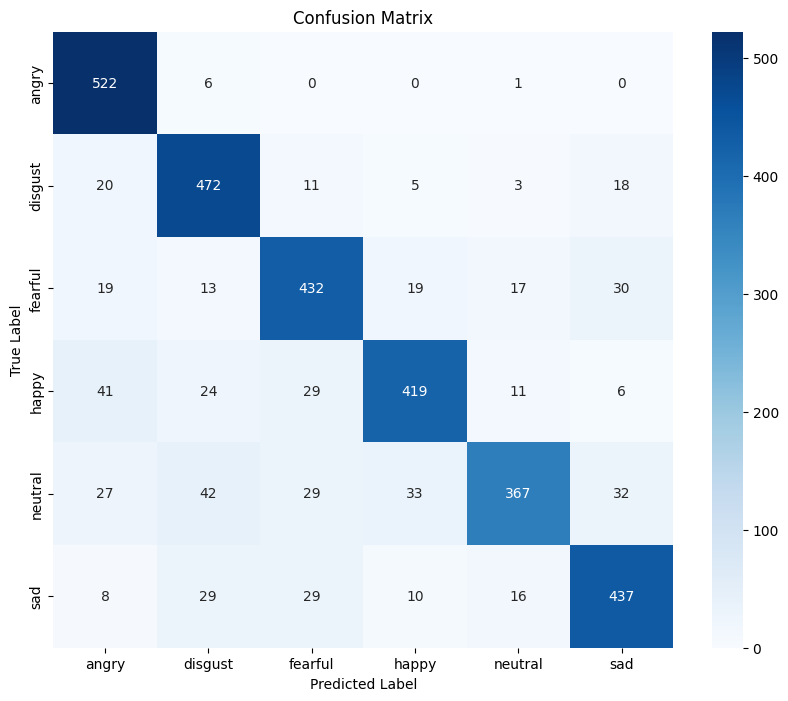

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict the probabilities for the test set
y_pred_probabilities = model.predict(X_test)

# Get the predicted class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Convert the one-hot encoded test labels back to integer labels for evaluation
y_test_encoded_eval = np.argmax(y_test_categorical, axis=1)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded_eval, y_pred, target_names=label_encoder.classes_))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test_encoded_eval, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()